1968213

<h1>Lecture 1, September 3, 2025 </h1>
 <h1>Stationary series </h1>

Marta Boczon

Department of Economics

Copnehagen Business School

mbo.eco@cbs.dk

# Introduction

1.   In contrast to cross sectional data, time series econometrics concerns itself with the evolvement of variables over time.
2.   Enders says: "The task facing the modern time-series econometrician is to develop reasonably simple models capable of forecasting, interpreting, and testing hypotheses concerning economic data."
3. A time series is a sequential set of data points, measured
typically over successive times.
4. Time series analysis comprises methods for analyzing time
series data in order to extract meaningful statistics and other
characteristics of the data.
5. A time series containing records of a single variable is termed
as univariate, but if records of more than one variable are
considered then it is termed as multivariate.
6. In general, a time series is affected by four components, i.e., trend, seasonal,cyclical and irregular components.


Examples of time series data:
1. Governent debt in Denmark
2. Gross domestic product per capita in Denmark
3. Labor force participation rate in Denmark
4. Market capitalization of domestic companies in Denmark
5. Unemployment rate in Denmark
6. COVID-19 cumulative deaths in Denmark

chart.svg

chart (1).svg

chart (2).svg

chart (3).svg

chart (4).svg

chart (5).svg

Examples of sources of data series data:
1. [Eurostat](https://ec.europa.eu/eurostat/data/database)
2. [FRED](https://fred.stlouisfed.org/)

# Building up an intuition: Time series vs DNA analysis

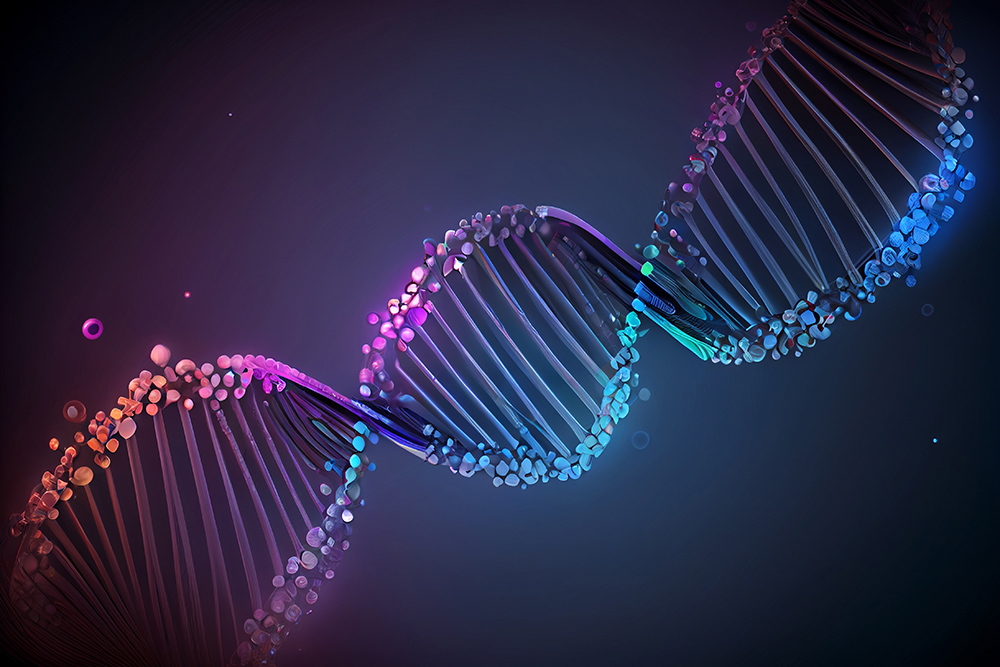

Just as a time series is the observed realization of an underlying data-generating process (DGP), DNA can be thought of as the biological DGP that generates the traits we see in humans. In time series, the DGP encodes the rules and dependencies—like how today’s value depends on past values—and the actual time series we observe is just one path that could have been produced under those rules. Similarly, DNA encodes the instructions that, together with environmental influences, generate observable characteristics such as eye color, height, or behavior. What we observe in an individual is just one realization of what the DNA “process” allows. In both cases, the underlying structure is invisible, but it dictates the patterns and variations in the realizations we study

# Introduction to an autoregressive process AR
Autoregressive process provides a half of the backbone time-series ARMA model. We can define an autoregressive sequence of
order $p$, denoted by AR($p$):

$$
y_t = \sum_{i=1}^p \beta_iy_{t-i} + ϵ_{t},
$$

where $y_t$ is the value of the time series at time $t$, $\beta_i$ are the autoregressive coefficients that capture how past values influence the present, and $\epsilon_t$ is the error term (or innovation) at time $t$. 

As we can see the model is a linear function of the previous $y$ as well as of the current shock (with coefficient 1). Intuitively, an AR($p$) process models the present as a weighted sum of the $p$ most recent past values plus a new shock.


**Examples:**


AR(1): $$
y_t = \beta_1 y_{t-1} + ϵ_{t} $$

AR(2): $$
y_t = \beta_1 y_{t-1} + \beta_2 y_{t-2} +ϵ_{t}$$

AR(3): $$
y_t = \beta_1 y_{t-1} + \beta_2 y_{t-2} + \beta_3 y_{t-3} +ϵ_{t}$$



 **Estimation:** This model can be estimated via OLS or maximum likelihood among others because the predictors are directly observed.


# R: Generating an AR(1) process

In [1]:
# Define the number of time periods (observations) to simulate
T = 200
T

[1] 200

In [21]:
# Initialize a vector of length T with zeros to store the AR(1) process values
ar1 = rep(0, T)

# Show the first five entires of the vector ar1
head(ar1)

# Show the last five entires of the vector ar1
tail(ar1)

ar1

[1] 0 0 0 0 0 0

[1] 0 0 0 0 0 0

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [19]:
# Set the coefficient (AR(1) parameter)
beta = 0.8
beta

[1] 0.8

In [ ]:
# Generate random noise (innovations) from a Normal distribution
# rnorm(n, mean = 0, sd = 1) generates 'n' draws from N(mean, sd)
# Set seed for reproducibility
set.seed(123)              
e = rnorm(T, 0, 0.2)

# Display the first six shocks
head(e)

[1] -0.11209513 -0.04603550  0.31174166  0.01410168  0.02585755  0.34301300

In [5]:
# Generate the AR(1) process recursively
for (t in 2:T) {
    ar1[t] = beta * ar1[t-1] + e[t]
    # Each value depends on the previous one plus a new random shock
    # Start at t = 2 because ar1[t] depends on ar1[t-1];
    # there is no ar1[0], so ar1[1] must be set in advance (here initialized to 0)
}

# Show the first six simulated values of the AR(1) process
head(ar1)

[1]  0.0000000 -0.0460355  0.2749133  0.2340323  0.2130834  0.5134797

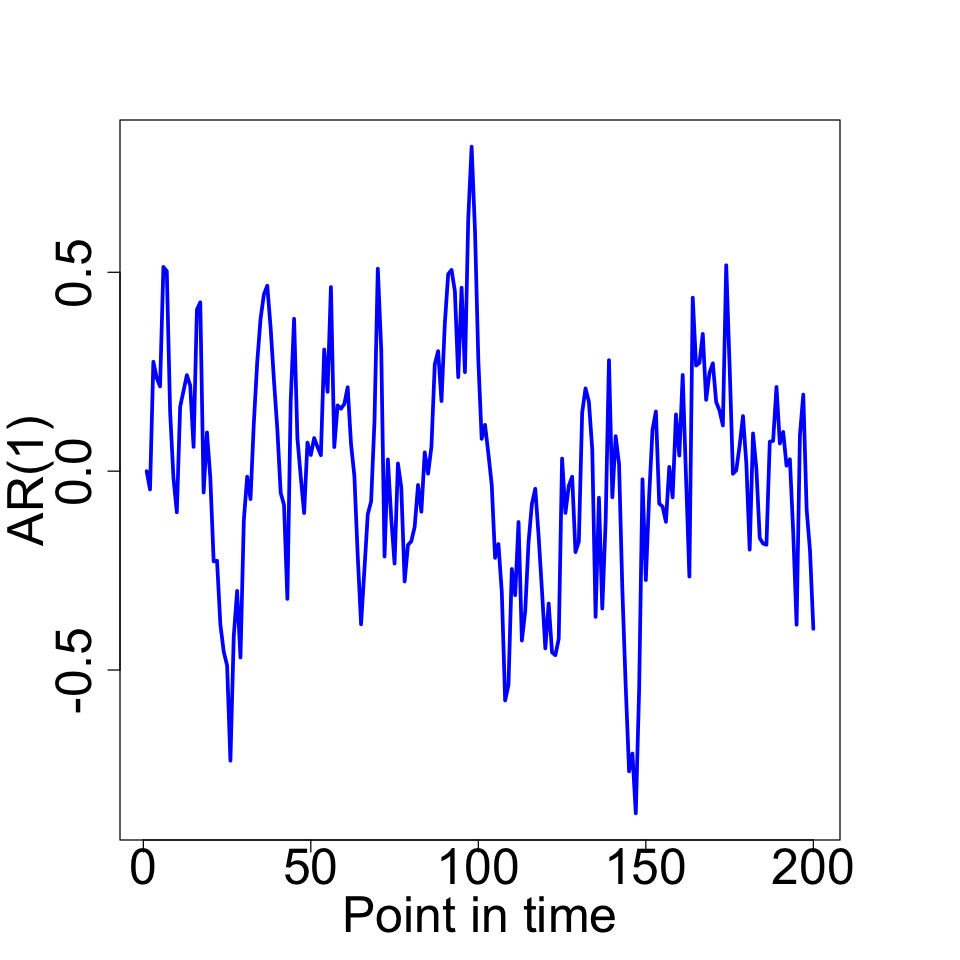

In [6]:
# Set plot dimensions for Jupyter/IRkernel (optional, ignored in base R)
options(repr.plot.width=8, repr.plot.height=8)

# Adjust plot margins (bottom, left, top, right)
par(mar = c(5, 5, 5, 5))

# Plot the simulated AR(1) process as a line graph
plot(
  ar1, 
  type = "l",              # line plot
  col = "blue",            # line color
  lwd = 3,                 # line width
  xlab = "Point in time",  # x-axis label
  ylab = "AR(1)",          # y-axis label
  cex.lab = 2.5,           # scaling factor for axis labels
  cex.axis = 2.5           # scaling factor for axis tick labels
)

# Introduction to a moving average process MA
The moving-average model provides the other
half of the backbone time-series ARMA model.  We can define a moving average sequence of
order $q$, denoted by MA($q$):

$$
y_t = \sum_{i=1}^q \beta_i ϵ_{t-i} + ϵ_{t},
$$

where $y_t$ is the value of the process at time $t$, $\beta_i$ are the coefficients, and $\varepsilon_t$ represents the shocks — unobservable random disturbances. These shocks are not measurable external events like weather, but rather the model’s error terms: the unexpected part of $y_t$ that remains after accounting for everything predictable from the past.

**Examples:**

MA(1): $$
y_t = \beta_1 ϵ_{t-1} + ϵ_{t} $$

MA(2): $$
y_t = \beta_1 ϵ_{t-1} + \beta_2 ϵ_{t-2} +ϵ_{t}$$

MA(3): $$
y_t = \beta_1 ϵ_{t-1} + \beta_2 ϵ_{t-2} + \beta_3 ϵ_{t-3} +ϵ_{t}$$

 **Estimation:** This model cannot be estimated via OLS because the predictors are unobservable. However, it can be estimated using maximum likelihood.

# R: Generating MA(1) process


In [7]:
# Define the number of time periods (observations) to simulate
T = 200
T

[1] 200

In [8]:
# Initialize a vector of length T with zeros to store the MA(1) process values
ma1 = rep(0, T)

# Show the first five entires of the vector ma1
head(ma1)

# Show the last five entires of the vector ma1
tail(ma1)

[1] 0 0 0 0 0 0

[1] 0 0 0 0 0 0

In [9]:
# Set the coefficient (MA(1) parameter)
beta = 0.8
beta

[1] 0.8

In [10]:
# Generate random noise (innovations) from a Normal distributio
# rnorm(n, mean = 0, sd = 1) generates 'n' draws from N(mean, sd)
# Set seed for reproducibility
set.seed(123)              
e = rnorm(T, 0, 0.2)

# Display the first six shocks
head(e)

[1] -0.11209513 -0.04603550  0.31174166  0.01410168  0.02585755  0.34301300

In [11]:
# Generate the MA(1) process recursively
for (t in 2:T) {
    ma1[t] = beta * e[t-1] + e[t]
    # Each value depends on the current shock plus the previous shock (lagged error term)
    # Start at t = 2 because we need e[t-1]; there is no e[0]
}

# Show the first six simulated values of the MA(1) process
head(ma1)

[1]  0.00000000 -0.13571160  0.27491326  0.26349501  0.03713889  0.36369904

In [ ]:
# Generate the MA(1) process recursively
for (t in 2:T) {
    ma1[t] = beta * e[t-1] + e[t]
    # Each value depends on the current shock plus the previous shock (lagged error term)
    # Start at t = 2 because we need e[t-1]; there is no e[0]
}

# Show the first six simulated values of the MA(1) process
head(ma1)

[1]  0.00000000 -0.13571160  0.27491326  0.26349501  0.03713889  0.36369904

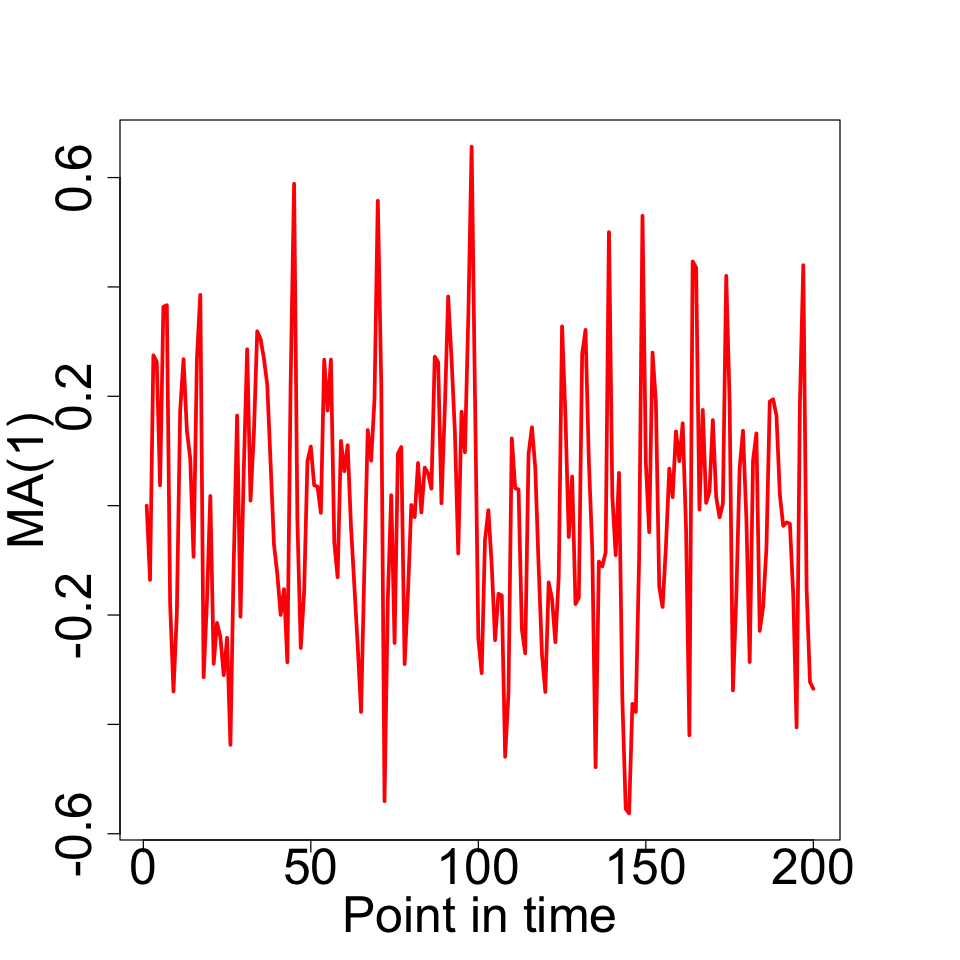

In [12]:
# Set plot dimensions for Jupyter/IRkernel (optional, ignored in base R)
options(repr.plot.width=8, repr.plot.height=8)

# Adjust plot margins (bottom, left, top, right)
par(mar = c(5, 5, 5, 5))

# Plot the simulated MA(1) process as a line graph
plot(
  ma1, 
  type = "l",              # line plot
  col = "red",             # line color
  lwd = 3,                 # line width
  xlab = "Point in time",  # x-axis label
  ylab = "MA(1)",          # y-axis label
  cex.lab = 2.5,           # scaling factor for axis labels
  cex.axis = 2.5           # scaling factor for axis tick labels
)

# Comparison of AR and MA processes

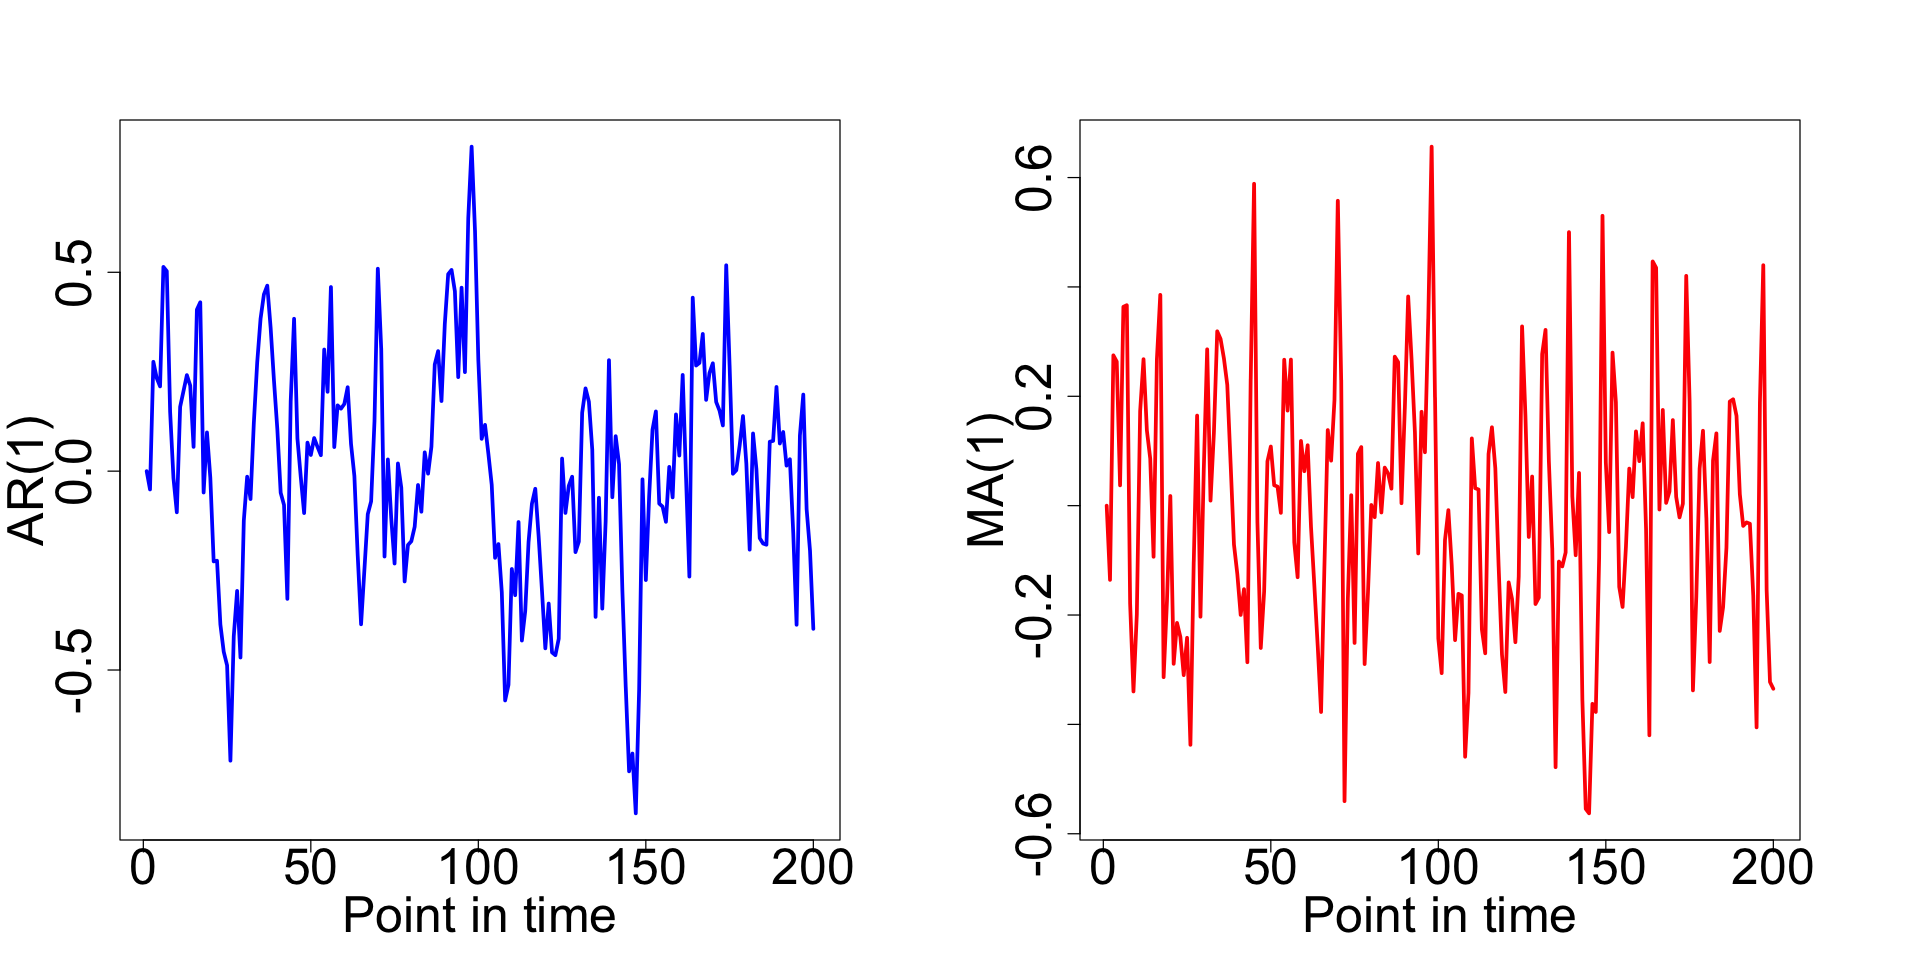

In [13]:
# Set plot dimensions for Jupyter/IRkernel (ignored in base R)
options(repr.plot.width = 16, repr.plot.height = 8)

# Adjust plot margins (bottom, left, top, right) in lines of text
par(mar = c(5, 5, 5, 5))

# Arrange plots in a 1x2 grid (1 row, 2 columns)
par(mfrow = c(1, 2))

# Plot the simulated AR(1) process
plot(
  ar1, 
  type = "l",               # line plot
  col = "blue",             # line color
  lwd = 3,                  # line width
  xlab = "Point in time",   # x-axis label
  ylab = "AR(1)",           # y-axis label
  cex.lab = 2.5,            # axis label size
  cex.axis = 2.5            # axis tick label size
)

# Plot the simulated MA(1) process
plot(
  ma1, 
  type = "l",               # line plot
  col = "red",              # line color
  lwd = 3,                  # line width
  xlab = "Point in time",   # x-axis label
  ylab = "MA(1)",           # y-axis label
  cex.lab = 2.5,            # axis label size
  cex.axis = 2.5            # axis tick label size
)


# Effect of a shock on AR process

In an AR($p$) process, the impact of a shock at time $t$ persists and gradually decays but never fully disappears.

This means that the effect of a shock is felt indefinitely, although its influence becomes weaker over time. In other words, an AR($p$) model incorporates the history of all prior shocks, with their impact fading as they move further into the past. This makes AR processes well-suited for modeling phenomena that evolve smoothly rather than jumping abruptly. For example, body temperature does not fluctuate wildly from one moment to the next — instead, it adjusts gradually, and current measurements remain close to recent ones.

# R: Shock AR(1) process for low beta

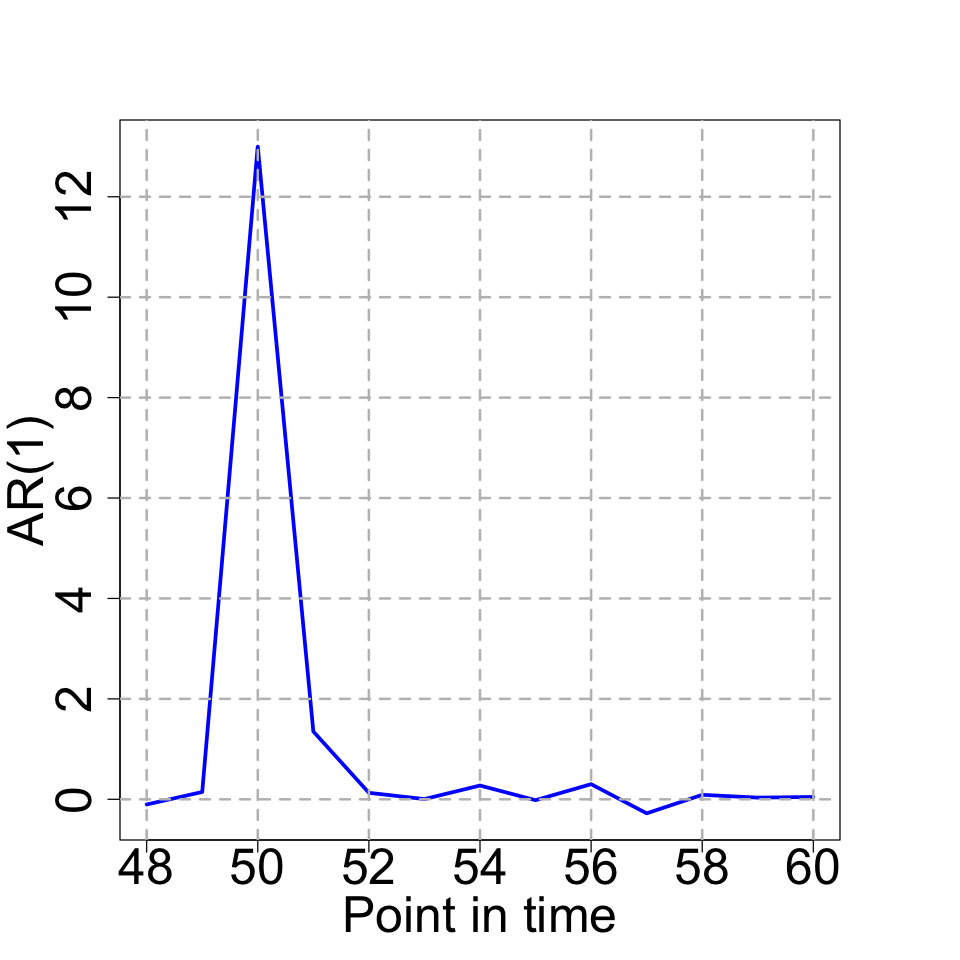

In [14]:
# Define the number of time periods (observations) to simulate
T = 200

# Initialize a vector of length T with zeros to store the AR(1) process values
ar1l = rep(0, T)

# Set the coefficient (AR(1) parameter)
beta = 0.1

# Generate shocks (innovations) from a Normal distribution
set.seed(123)               # set seed for reproducibility
e = rnorm(T, mean = 0, sd = 0.2)

# Generate the AR(1) process with a large shock at t = 50
for (t in 2:T) {
  if (t == 50) { 
    e[t] = e[t] + 13        # insert a big positive shock at time t = 50
  }
  # AR(1) recursion
  ar1l[t] = beta * ar1l[t-1] + e[t]
}

# Set plotting options
options(repr.plot.width = 8, repr.plot.height = 8)
par(mar = c(5, 5, 5, 5))

# Plot a zoomed-in window around the shock (t = 48 to 60)
plot(
  c(48:60), ar1l[48:60],
  type = "l", col = "blue", lwd = 3,            # line plot
  xlab = "Point in time", ylab = "AR(1)",       # axis labels
  cex.lab = 2.5, cex.axis = 2.5                 # scaling factors
)

# Add gridlines for readability
grid(nx = NULL, ny = NULL,
     lty = 2,      # dashed lines
     col = "gray", # grid color
     lwd = 2)      # grid width

# R: Shock AR(1) process for high beta

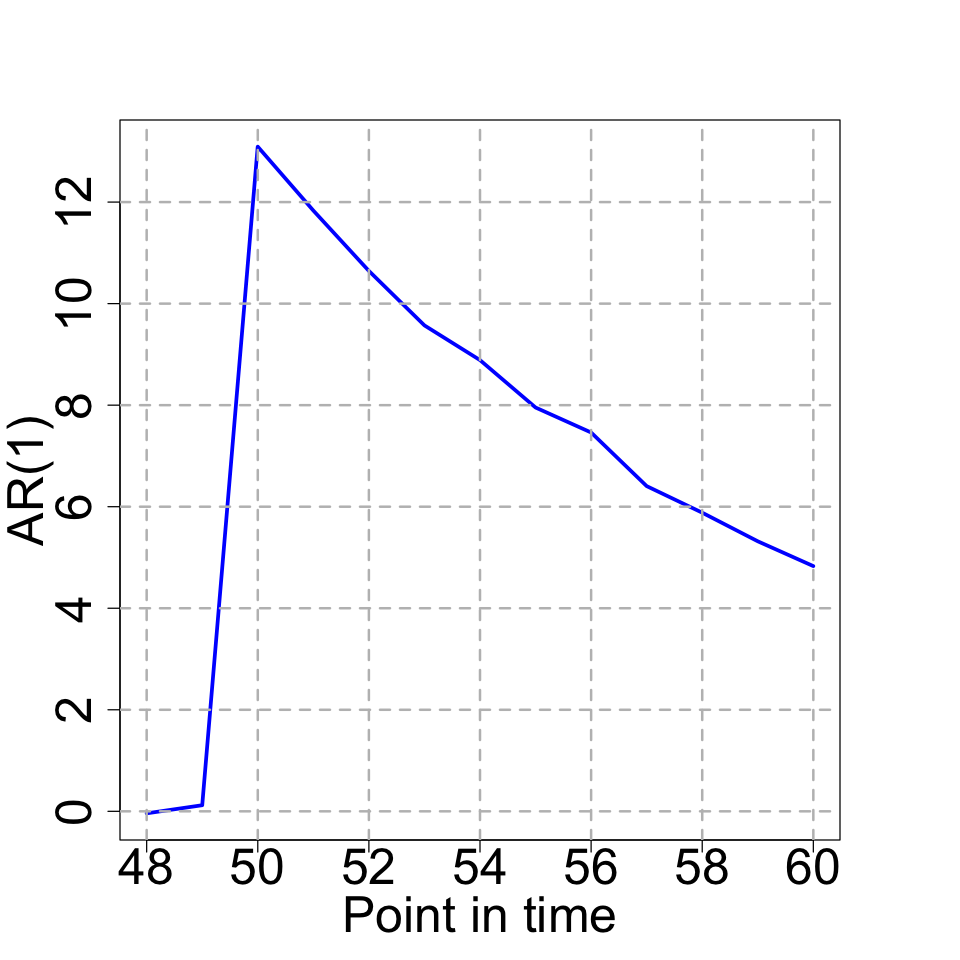

In [15]:
# Define the number of time periods (observations) to simulate
T = 200

# Initialize a vector of length T with zeros to store the AR(1) process values
ar1h = rep(0, T)

# Set the coefficient (AR(1) parameter)
beta = 0.9

# Generate shocks (innovations) from a Normal distribution
set.seed(123)               # set seed for reproducibility
e = rnorm(T, mean = 0, sd = 0.2)

# Generate the AR(1) process with a large shock at t = 50
for (t in 2:T) {
  if (t == 50) { 
    e[t] = e[t] + 13        # insert a big positive shock at time t = 50
  }
  # AR(1) recursion
  ar1h[t] = beta * ar1h[t-1] + e[t]
}

# Set plotting options
options(repr.plot.width = 8, repr.plot.height = 8)
par(mar = c(5, 5, 5, 5))

# Plot a zoomed-in window around the shock (t = 48 to 60)
plot(
  c(48:60), ar1h[48:60],
  type = "l", col = "blue", lwd = 3,            # line plot
  xlab = "Point in time", ylab = "AR(1)",       # axis labels
  cex.lab = 2.5, cex.axis = 2.5                 # scaling factors
)

# Add gridlines for readability
grid(nx = NULL, ny = NULL,
     lty = 2,      # dashed lines
     col = "gray", # grid color
     lwd = 2)      # grid width

# Effect of a shock on MA process

For MA processes, the effect of a shock fully disappears after $q$ periods.

For example, in an MA(1) process, a shock at time $t$ influences $y_t$ (through the current shock) and $y_{t+1}$ (through the lagged shock). By $t+2$, its effect is gone.

In general, for an MA($q$) process, each shock affects the series for at most $q+1$ periods before vanishing completely. The magnitude of its impact during those periods depends on the size of the coefficients $\beta_i$.

This is in sharp contrast to AR($p$) processes, where the effect of a single shock persists indefinitely — fading gradually but never truly disappearing. Thus, AR processes have infinite memory, while MA processes have finite memory.

# R: Shock MA(1) process with low beta

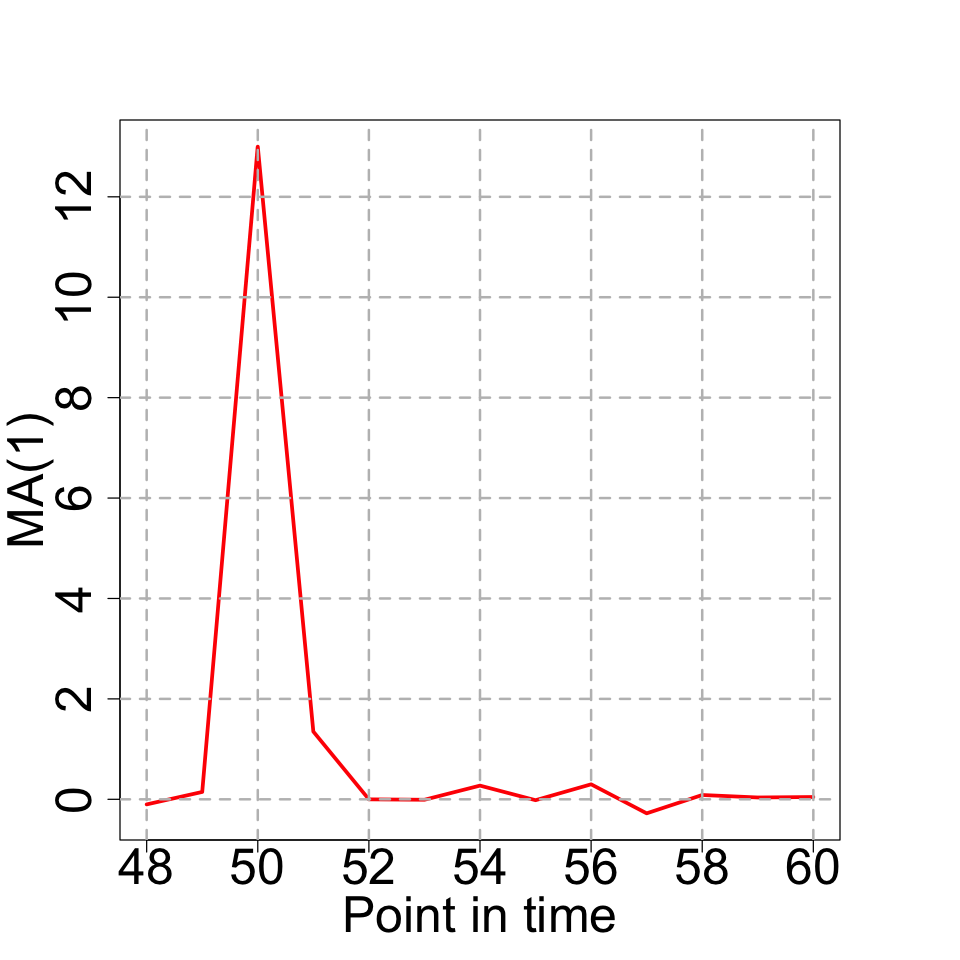

In [16]:
# Define the number of time periods (observations) to simulate
T = 200

# Initialize a vector of length T with zeros to store the MA(1) process values
ma1l = rep(0, T)

# Set the coefficient (MA(1) parameter)
beta = 0.1

# Generate shocks (innovations) from a Normal distribution
set.seed(123)               # set seed for reproducibility
e = rnorm(T, mean = 0, sd = 0.2)

# Generate the MA(1) process with a big shock at t = 50
for (t in 2:T) {
  if (t == 50) { 
    e[t] = e[t] + 13        # insert a big positive shock at time t = 50
  }
  # MA(1) recursion
  ma1l[t] = beta * e[t-1] + e[t]
}

# Set plotting options
options(repr.plot.width = 8, repr.plot.height = 8)
par(mar = c(5, 5, 5, 5))

# Plot a zoomed-in window around the shock (t = 48 to 60)
plot(
  c(48:60), ma1l[48:60],
  type = "l", col = "red", lwd = 3,             # line plot
  xlab = "Point in time", ylab = "MA(1)",       # axis labels
  cex.lab = 2.5, cex.axis = 2.5                 # scaling factors
)

# Add gridlines for readability
grid(nx = NULL, ny = NULL,
     lty = 2,      # dashed lines
     col = "gray", # grid color
     lwd = 2)      # grid width

# R: Shock MA(1) process with high beta

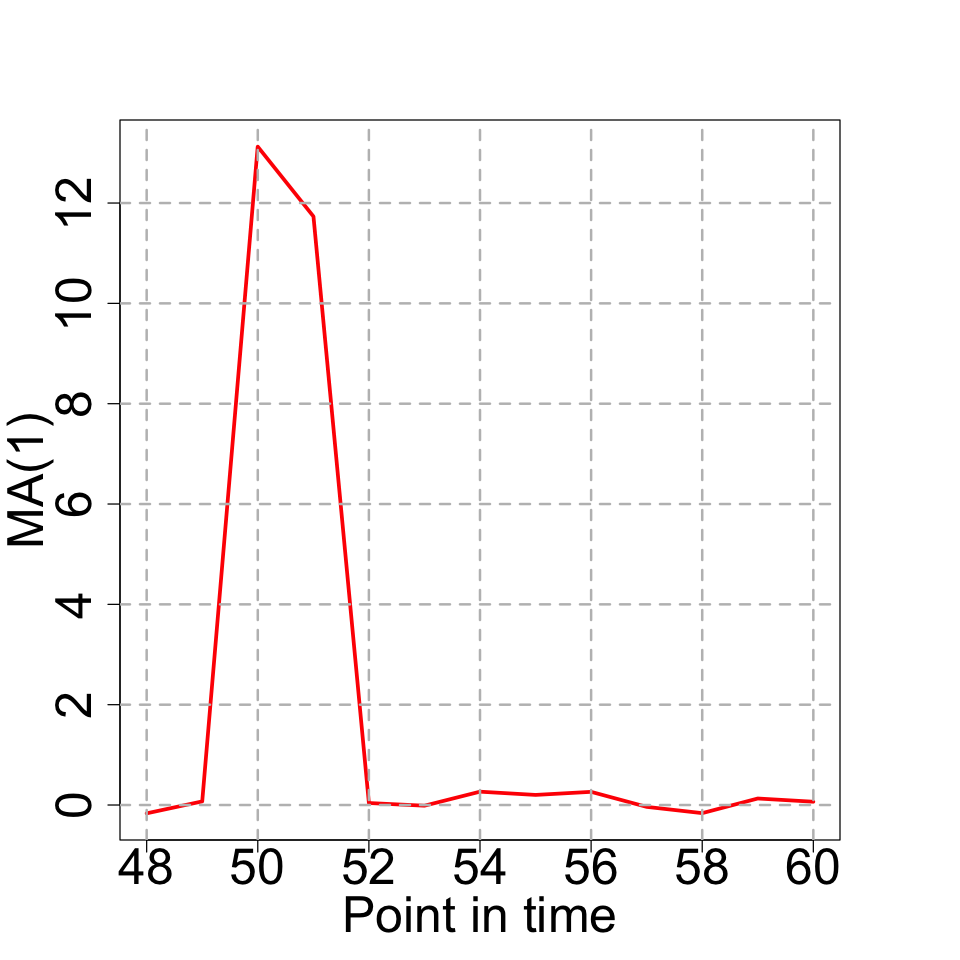

In [17]:
# Define the number of time periods (observations) to simulate
T = 200

# Initialize a vector of length T with zeros to store the MA(1) process values
ma1h = rep(0, T)

# Set the coefficient (MA(1) parameter)
beta = 0.9

# Generate shocks (innovations) from a Normal distribution
set.seed(123)               # set seed for reproducibility
e = rnorm(T, mean = 0, sd = 0.2)

# Generate the MA(1) process with a big shock at t = 50
for (t in 2:T) {
  if (t == 50) { 
    e[t] = e[t] + 13        # insert a big positive shock at time t = 50
  }
  # MA(1) recursion
  ma1h[t] = beta * e[t-1] + e[t]
}

# Set plotting options
options(repr.plot.width = 8, repr.plot.height = 8)
par(mar = c(5, 5, 5, 5))

# Plot a zoomed-in window around the shock (t = 48 to 60)
plot(
  c(48:60), ma1h[48:60],
  type = "l", col = "red", lwd = 3,             # line plot
  xlab = "Point in time", ylab = "MA(1)",       # axis labels
  cex.lab = 2.5, cex.axis = 2.5                 # scaling factors
)

# Add gridlines for readability
grid(nx = NULL, ny = NULL,
     lty = 2,      # dashed lines
     col = "gray", # grid color
     lwd = 2)      # grid width

# Exercise:

Simulate 1,000 observations from an AR(3) process, and an MA(3) process, using the coefficients:

$\beta_1 = 0.2$

$\beta_2 = 0.1$

$\beta_3 = 0.2$

Introduce a large random shock at time $t = 800$, and plot the series to compare how the effect of the shock evolves in the AR(3) versus the MA(3) process.

https://python.plainenglish.io/how-to-convert-google-colab-notebook-ipynb-to-html-ccfeda199246

%%shell

jupyter nbconvert --to html ///content/sample_data/lecture_1.ipynb

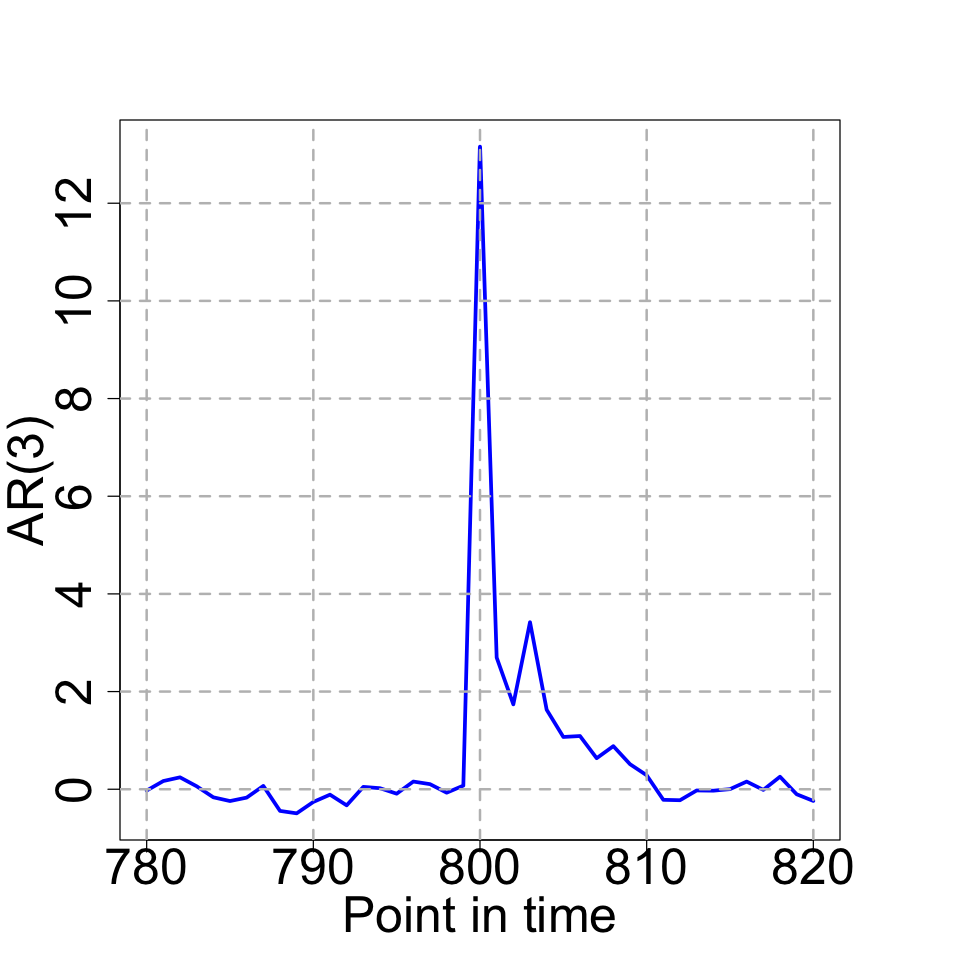

In [22]:
# Define the number of time periods (observations) to simulate
T = 1000

# Initialize a vector of length T with zeros to store the AR(1) process values
ar3l = rep(0, T)

# Set the coefficient (AR(1) parameter)
beta1 = 0.2
beta2 = 0.1
beta3 = 0.2

# Generate shocks (innovations) from a Normal distribution
set.seed(123)               # set seed for reproducibility
e = rnorm(T, mean = 0, sd = 0.2)

# Generate the AR(3) process with a large shock at t = 800
for (t in 4:T) {
  if (t == 800) { 
    e[t] = e[t] + 13        # insert a big positive shock at time t = 800
  }
  # AR(1) recursion
  ar3l[t] = ( beta1 * ar3l[t-1] ) + ( beta2 * ar3l[t-2] ) + ( beta3 * ar3l[t-3] ) + e[t]
}

# Set plotting options
options(repr.plot.width = 8, repr.plot.height = 8)
par(mar = c(5, 5, 5, 5))

# Plot a zoomed-in window around the shock (t = 48 to 60)
plot(
  c(780:820), ar3l[780:820],
  type = "l", col = "blue", lwd = 3,            # line plot
  xlab = "Point in time", ylab = "AR(3)",       # axis labels
  cex.lab = 2.5, cex.axis = 2.5                 # scaling factors
)

# Add gridlines for readability
grid(nx = NULL, ny = NULL,
     lty = 2,      # dashed lines
     col = "gray", # grid color
     lwd = 2)      # grid width

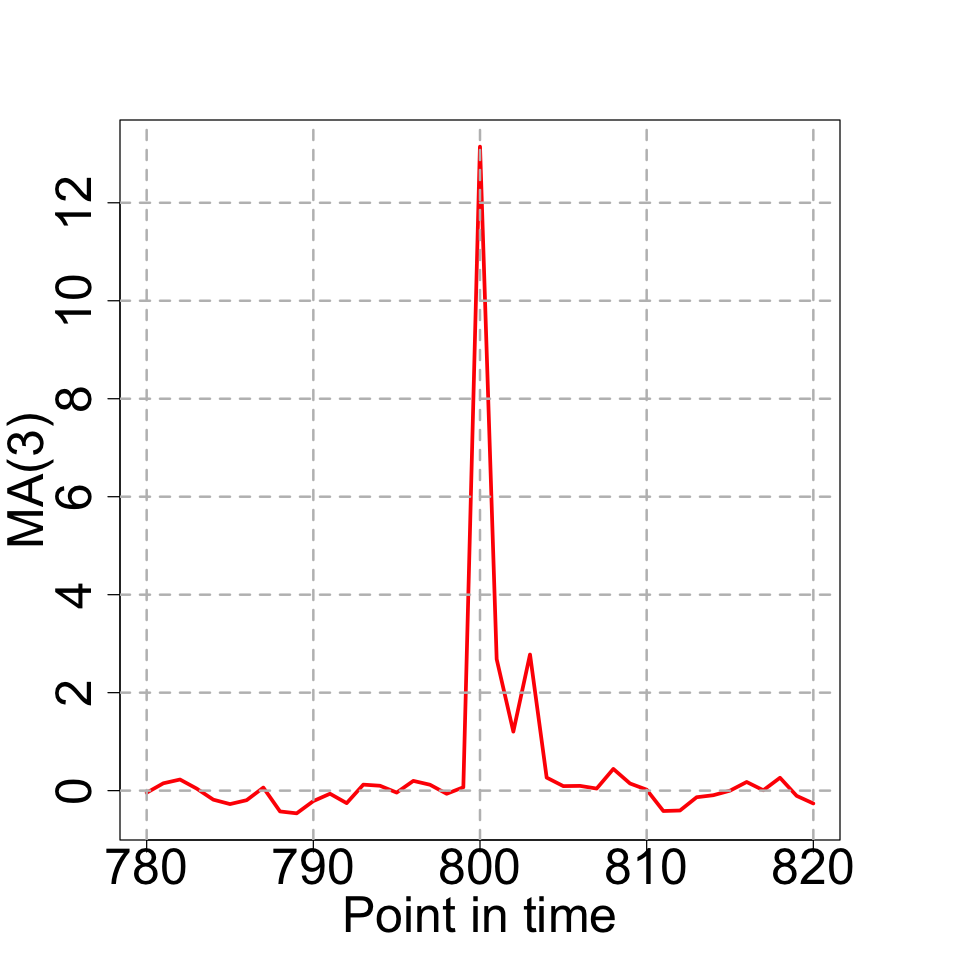

In [26]:
# Define the number of time periods (observations) to simulate
T = 10000

# Initialize a vector of length T with zeros to store the MA(3) process values
ma3h = rep(0, T)

# Set the coefficient (MA(3) parameter)
beta1 = 0.2
beta2 = 0.1
beta3 = 0.2

# Generate shocks (innovations) from a Normal distribution
set.seed(123)               # set seed for reproducibility
e = rnorm(T, mean = 0, sd = 0.2)

# Generate the MA(1) process with a big shock at t = 800
for (t in 4:T) {
  if (t == 800) { 
    e[t] = e[t] + 13        # insert a big positive shock at time t = 800
  }
  # MA(1) recursion
  ma3h[t] = ( beta1 * e[t-1] ) + ( beta2 * e[t-2] ) + ( beta3 * e[t-3] ) + e[t]
}

# Set plotting options
options(repr.plot.width = 8, repr.plot.height = 8)
par(mar = c(5, 5, 5, 5))

# Plot a zoomed-in window around the shock (t = 48 to 60)
plot(
  c(780:820), ma3h[780:820],
  type = "l", col = "red", lwd = 3,             # line plot
  xlab = "Point in time", ylab = "MA(3)",       # axis labels
  cex.lab = 2.5, cex.axis = 2.5                 # scaling factors
)

# Add gridlines for readability
grid(nx = NULL, ny = NULL,
     lty = 2,      # dashed lines
     col = "gray", # grid color
     lwd = 2)      # grid width

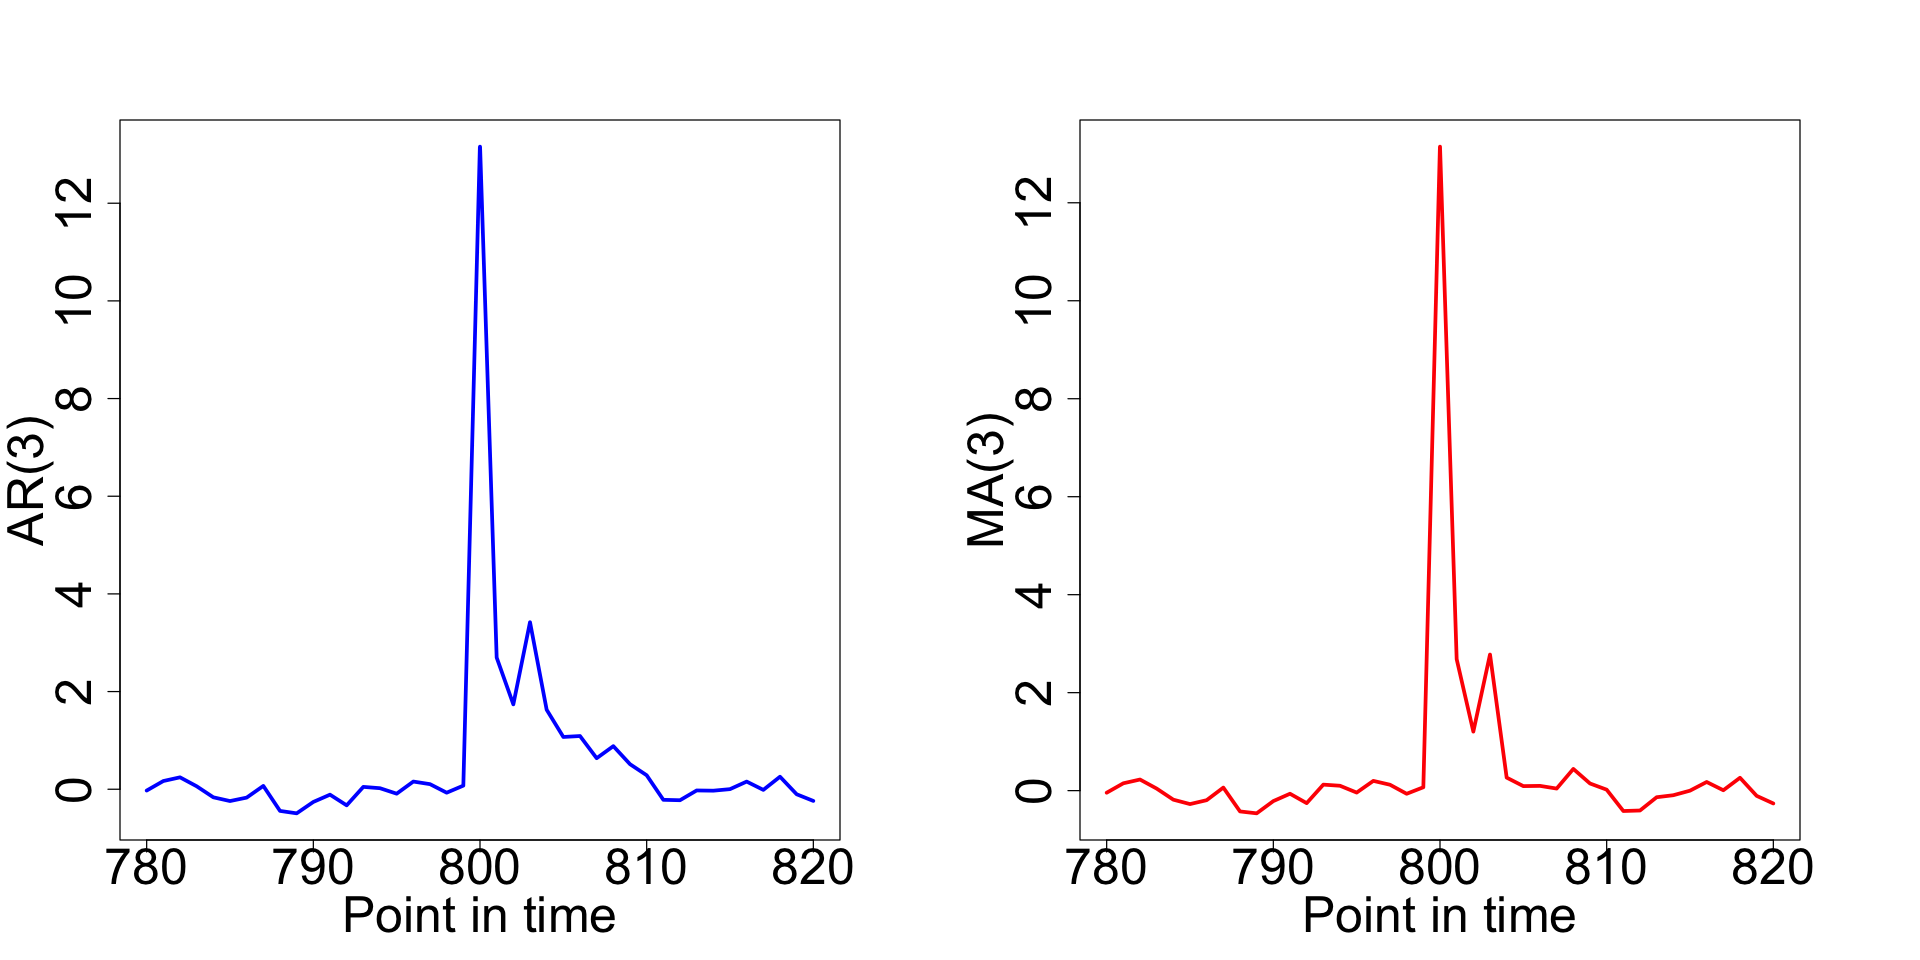

In [28]:
# Set plot dimensions for Jupyter/IRkernel (ignored in base R)
options(repr.plot.width = 16, repr.plot.height = 8)

# Adjust plot margins (bottom, left, top, right) in lines of text
par(mar = c(5, 5, 5, 5))

# Arrange plots in a 1x2 grid (1 row, 2 columns)
par(mfrow = c(1, 2))

# Plot a zoomed-in window around the shock (t = 48 to 60)
plot(
  c(780:820), ar3l[780:820],
  type = "l", col = "blue", lwd = 3,            # line plot
  xlab = "Point in time", ylab = "AR(3)",       # axis labels
  cex.lab = 2.5, cex.axis = 2.5                 # scaling factors
)

plot(
  c(780:820), ma3h[780:820],
  type = "l", col = "red", lwd = 3,             # line plot
  xlab = "Point in time", ylab = "MA(3)",       # axis labels
  cex.lab = 2.5, cex.axis = 2.5                 # scaling factors
)


In this simulation, the difference between AR(3) and MA(3) is clear in how they respond to a large shock at $t=800$. In the MA(3) process, the shock only affects the current value and the following three lags, after which its influence disappears entirely; the effect is sharp but short-lived. In contrast, in the AR(3) process, the shock propagates recursively because each new value depends on past values, which themselves contain part of the shock. As a result, the disturbance decays gradually but can persist for a long time, producing a trailing effect. This illustrates the key distinction: MA processes have finite memory, while AR processes have infinite memory (though decaying), so shocks die out quickly in MA models but echo through time in AR models.